In [1]:
from models import *
from training import train_multi_modal
from torch.nn import BCEWithLogitsLoss
from torch.optim import AdamW
from torch.optim.lr_scheduler import CosineAnnealingLR
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
training_set = np.load('training_set.npz')
env_vars = training_set['env']
timeseries = training_set['landsat']
images = training_set['images']
labels = training_set['labels']

validation_set = np.load('validation_set.npz')
val_env_vars = validation_set['env']
val_timeseries = validation_set['landsat']
val_images = validation_set['images']
val_labels = validation_set['labels']

batch_size = 16

dataset = MultiModalDataset(env_vars, timeseries, images, labels)
dataloader = DataLoader(dataset, batch_size, shuffle=True)

val_dataset = MultiModalDataset(val_env_vars, val_timeseries, val_images, val_labels)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [12]:
from torchvision.models import resnet50, ResNet50_Weights
from encoder import ResNet50Encoder

#model = resnet50(weights=ResNet50_Weights.DEFAULT)
model = ResNet50Encoder(64)

for name, param in model.named_parameters():
    if param.requires_grad:
        print(name)

encoder.7.0.conv1.weight
encoder.7.0.bn1.weight
encoder.7.0.bn1.bias
encoder.7.0.conv2.weight
encoder.7.0.bn2.weight
encoder.7.0.bn2.bias
encoder.7.0.conv3.weight
encoder.7.0.bn3.weight
encoder.7.0.bn3.bias
encoder.7.0.downsample.0.weight
encoder.7.0.downsample.1.weight
encoder.7.0.downsample.1.bias
encoder.7.1.conv1.weight
encoder.7.1.bn1.weight
encoder.7.1.bn1.bias
encoder.7.1.conv2.weight
encoder.7.1.bn2.weight
encoder.7.1.bn2.bias
encoder.7.1.conv3.weight
encoder.7.1.bn3.weight
encoder.7.1.bn3.bias
encoder.7.2.conv1.weight
encoder.7.2.bn1.weight
encoder.7.2.bn1.bias
encoder.7.2.conv2.weight
encoder.7.2.bn2.weight
encoder.7.2.bn2.bias
encoder.7.2.conv3.weight
encoder.7.2.bn3.weight
encoder.7.2.bn3.bias
proj.1.weight
proj.1.bias


In [2]:
for name, layer in model.named_children():
    print(name)

conv1
bn1
relu
maxpool
layer1
layer2
layer3
layer4
avgpool
fc


## Simple sum

Total params of MultiModalSimpleFuser: 246230


Epoch:   2%|▎         | 1/40 [00:47<31:07, 47.89s/it]

Epoch 1/40 | Train Loss: 0.3564 | Val Loss: 0.1877


Epoch:   5%|▌         | 2/40 [01:38<31:19, 49.47s/it]

Epoch 2/40 | Train Loss: 0.1798 | Val Loss: 0.1707


Epoch:   8%|▊         | 3/40 [02:29<30:52, 50.06s/it]

Epoch 3/40 | Train Loss: 0.1860 | Val Loss: 0.1568


Epoch:  10%|█         | 4/40 [03:19<30:08, 50.24s/it]

Epoch 4/40 | Train Loss: 0.1826 | Val Loss: 0.1543


Epoch:  12%|█▎        | 5/40 [04:10<29:20, 50.31s/it]

Epoch 5/40 | Train Loss: 0.1690 | Val Loss: 0.1579


Epoch:  15%|█▌        | 6/40 [05:01<28:37, 50.53s/it]

Epoch 6/40 | Train Loss: 0.1634 | Val Loss: 0.1649


Epoch:  18%|█▊        | 7/40 [05:53<28:05, 51.07s/it]

Epoch 7/40 | Train Loss: 0.1661 | Val Loss: 0.1690


Epoch:  20%|██        | 8/40 [06:46<27:37, 51.81s/it]

Epoch 8/40 | Train Loss: 0.1689 | Val Loss: 0.1728


Epoch:  22%|██▎       | 9/40 [07:41<27:12, 52.67s/it]

Epoch 9/40 | Train Loss: 0.1667 | Val Loss: 0.1629


Epoch:  25%|██▌       | 10/40 [08:36<26:46, 53.55s/it]

Epoch 10/40 | Train Loss: 0.1699 | Val Loss: 0.1822


Epoch:  28%|██▊       | 11/40 [09:30<25:56, 53.66s/it]

Epoch 11/40 | Train Loss: 0.1717 | Val Loss: 0.1810


Epoch:  30%|███       | 12/40 [10:21<24:38, 52.80s/it]

Epoch 12/40 | Train Loss: 0.1669 | Val Loss: 0.1677


Epoch:  32%|███▎      | 13/40 [11:12<23:28, 52.16s/it]

Epoch 13/40 | Train Loss: 0.1606 | Val Loss: 0.1519


Epoch:  35%|███▌      | 14/40 [12:03<22:29, 51.91s/it]

Epoch 14/40 | Train Loss: 0.1528 | Val Loss: 0.1544


Epoch:  38%|███▊      | 15/40 [12:56<21:47, 52.32s/it]

Epoch 15/40 | Train Loss: 0.1515 | Val Loss: 0.1531


Epoch:  40%|████      | 16/40 [13:51<21:13, 53.05s/it]

Epoch 16/40 | Train Loss: 0.1533 | Val Loss: 0.1608


Epoch:  42%|████▎     | 17/40 [14:46<20:33, 53.65s/it]

Epoch 17/40 | Train Loss: 0.1544 | Val Loss: 0.1772


Epoch:  45%|████▌     | 18/40 [15:42<19:57, 54.43s/it]

Epoch 18/40 | Train Loss: 0.1549 | Val Loss: 0.1672


Epoch:  48%|████▊     | 19/40 [16:39<19:18, 55.15s/it]

Epoch 19/40 | Train Loss: 0.1572 | Val Loss: 0.1569


Epoch:  50%|█████     | 20/40 [17:34<18:19, 54.97s/it]

Epoch 20/40 | Train Loss: 0.1572 | Val Loss: 0.1518


Epoch:  52%|█████▎    | 21/40 [18:25<17:00, 53.72s/it]

Epoch 21/40 | Train Loss: 0.1588 | Val Loss: 0.1492


Epoch:  55%|█████▌    | 22/40 [19:15<15:51, 52.86s/it]

Epoch 22/40 | Train Loss: 0.1582 | Val Loss: 0.1587


Epoch:  57%|█████▊    | 23/40 [20:08<14:56, 52.71s/it]

Epoch 23/40 | Train Loss: 0.1634 | Val Loss: 0.1497


Epoch:  60%|██████    | 24/40 [21:02<14:11, 53.22s/it]

Epoch 24/40 | Train Loss: 0.1613 | Val Loss: 0.1520


Epoch:  62%|██████▎   | 25/40 [21:57<13:26, 53.77s/it]

Epoch 25/40 | Train Loss: 0.1669 | Val Loss: 0.1625


Epoch:  65%|██████▌   | 26/40 [22:53<12:41, 54.40s/it]

Epoch 26/40 | Train Loss: 0.1638 | Val Loss: 0.1654


Epoch:  68%|██████▊   | 27/40 [23:50<11:58, 55.24s/it]

Epoch 27/40 | Train Loss: 0.1622 | Val Loss: 0.1718


Epoch:  70%|███████   | 28/40 [24:47<11:09, 55.75s/it]

Epoch 28/40 | Train Loss: 0.1623 | Val Loss: 0.1614


Epoch:  72%|███████▎  | 29/40 [25:41<10:07, 55.19s/it]

Epoch 29/40 | Train Loss: 0.1646 | Val Loss: 0.1574


Epoch:  75%|███████▌  | 30/40 [26:32<09:00, 54.01s/it]

Epoch 30/40 | Train Loss: 0.1665 | Val Loss: 0.1640


Epoch:  78%|███████▊  | 31/40 [27:24<07:58, 53.16s/it]

Epoch 31/40 | Train Loss: 0.1569 | Val Loss: 0.1807


Epoch:  80%|████████  | 32/40 [28:16<07:03, 52.93s/it]

Epoch 32/40 | Train Loss: 0.1655 | Val Loss: 0.1612


Epoch:  82%|████████▎ | 33/40 [29:11<06:15, 53.60s/it]

Epoch 33/40 | Train Loss: 0.1748 | Val Loss: 0.1557


Epoch:  85%|████████▌ | 34/40 [30:07<05:25, 54.28s/it]

Epoch 34/40 | Train Loss: 0.1612 | Val Loss: 0.1799


Epoch:  88%|████████▊ | 35/40 [31:03<04:34, 54.87s/it]

Epoch 35/40 | Train Loss: 0.1640 | Val Loss: 0.1578


Epoch:  90%|█████████ | 36/40 [32:00<03:42, 55.57s/it]

Epoch 36/40 | Train Loss: 0.1642 | Val Loss: 0.1699


Epoch:  92%|█████████▎| 37/40 [32:57<02:47, 55.86s/it]

Epoch 37/40 | Train Loss: 0.1614 | Val Loss: 0.1615


Epoch:  95%|█████████▌| 38/40 [33:50<01:50, 55.16s/it]

Epoch 38/40 | Train Loss: 0.1653 | Val Loss: 0.1663


Epoch:  98%|█████████▊| 39/40 [34:42<00:53, 53.99s/it]

Epoch 39/40 | Train Loss: 0.1602 | Val Loss: 0.1612


Epoch: 100%|██████████| 40/40 [35:34<00:00, 53.35s/it]

Epoch 40/40 | Train Loss: 0.1651 | Val Loss: 0.1583


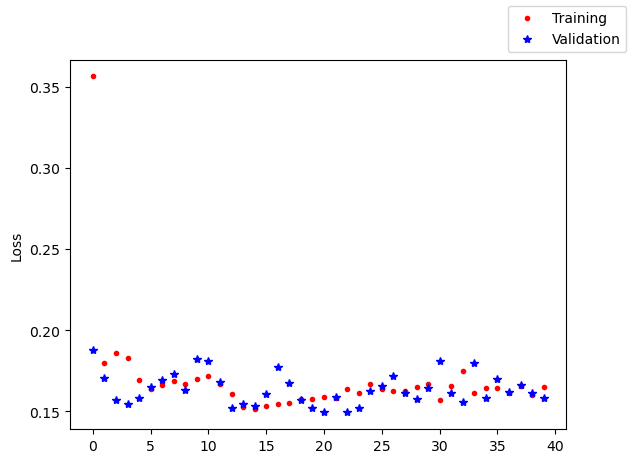

In [4]:
# Set model parameters
epochs = 40
batch_size = 16
lr = 1e-4
embed_dim = 64
hidden_dim = embed_dim * 2
dropout = 0

model = MultiModalSimpleFuser(env_vars.shape[-1], timeseries.shape[-1], hidden_dim, embed_dim, dropout, use_sum=True)
print(f"Total params of {model.__class__.__name__}: {sum(p.numel() for p in model.parameters() if p.requires_grad)}")

optimizer = AdamW(filter(lambda p: p.requires_grad, model.parameters()), lr)
criterion = BCEWithLogitsLoss(reduction='mean')
scheduler = CosineAnnealingLR(optimizer, T_max=epochs)

losses, vlosses = train_multi_modal(model, dataloader, val_loader, epochs, optimizer, scheduler, criterion, device)

fig, ax = plt.subplots()

ax.plot(losses, 'r.', label='Training', )
ax.plot(vlosses, 'b*', label='Validation')
ax.set_label('Epoch')
ax.set_ylabel('Loss')

fig.legend()
plt.show()

## Attention pooling

/home/scanton/Anaconda3/envs/spt-diffusion/lib/python3.14/site-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.01 and num_layers=1
  warnings.warn(


Total params of MultiModalAttentionFuser: 288150


Epoch:   5%|▌         | 1/20 [00:49<15:35, 49.26s/it]

Epoch 1/20 | Train Loss: 0.5710 | Val Loss: 0.1828


Epoch:  10%|█         | 2/20 [01:41<15:18, 51.02s/it]

Epoch 2/20 | Train Loss: 0.2059 | Val Loss: 0.1827


Epoch:  15%|█▌        | 3/20 [02:33<14:31, 51.26s/it]

Epoch 3/20 | Train Loss: 0.1651 | Val Loss: 0.1497


Epoch:  20%|██        | 4/20 [03:25<13:45, 51.60s/it]

Epoch 4/20 | Train Loss: 0.1545 | Val Loss: 0.1612


Epoch:  25%|██▌       | 5/20 [04:16<12:50, 51.37s/it]

Epoch 5/20 | Train Loss: 0.1540 | Val Loss: 0.1505


Epoch:  30%|███       | 6/20 [05:06<11:53, 50.99s/it]

Epoch 6/20 | Train Loss: 0.1520 | Val Loss: 0.1513


Epoch:  35%|███▌      | 7/20 [05:56<11:01, 50.86s/it]

Epoch 7/20 | Train Loss: 0.1487 | Val Loss: 0.1488


Epoch:  40%|████      | 8/20 [06:50<10:21, 51.78s/it]

Epoch 8/20 | Train Loss: 0.1539 | Val Loss: 0.1720


Epoch:  45%|████▌     | 9/20 [07:44<09:36, 52.44s/it]

Epoch 9/20 | Train Loss: 0.1484 | Val Loss: 0.1459


Epoch:  50%|█████     | 10/20 [08:39<08:52, 53.21s/it]

Epoch 10/20 | Train Loss: 0.1527 | Val Loss: 0.1481


Epoch:  55%|█████▌    | 11/20 [09:35<08:05, 53.99s/it]

Epoch 11/20 | Train Loss: 0.1501 | Val Loss: 0.1509


Epoch:  60%|██████    | 12/20 [10:30<07:15, 54.41s/it]

Epoch 12/20 | Train Loss: 0.1528 | Val Loss: 0.1545


Epoch:  65%|██████▌   | 13/20 [11:24<06:19, 54.17s/it]

Epoch 13/20 | Train Loss: 0.1533 | Val Loss: 0.1513


Epoch:  70%|███████   | 14/20 [12:17<05:23, 53.89s/it]

Epoch 14/20 | Train Loss: 0.1588 | Val Loss: 0.1470


Epoch:  75%|███████▌  | 15/20 [13:15<04:34, 54.98s/it]

Epoch 15/20 | Train Loss: 0.1696 | Val Loss: 0.1489


Epoch:  80%|████████  | 16/20 [14:14<03:44, 56.25s/it]

Epoch 16/20 | Train Loss: 0.1547 | Val Loss: 0.1481


Epoch:  85%|████████▌ | 17/20 [15:11<02:49, 56.64s/it]

Epoch 17/20 | Train Loss: 0.1532 | Val Loss: 0.1505


Epoch:  90%|█████████ | 18/20 [16:09<01:54, 57.08s/it]

Epoch 18/20 | Train Loss: 0.1542 | Val Loss: 0.1491


Epoch:  95%|█████████▌| 19/20 [17:07<00:57, 57.12s/it]

Epoch 19/20 | Train Loss: 0.1485 | Val Loss: 0.1475


Epoch: 100%|██████████| 20/20 [18:03<00:00, 54.16s/it]

Epoch 20/20 | Train Loss: 0.1482 | Val Loss: 0.1481


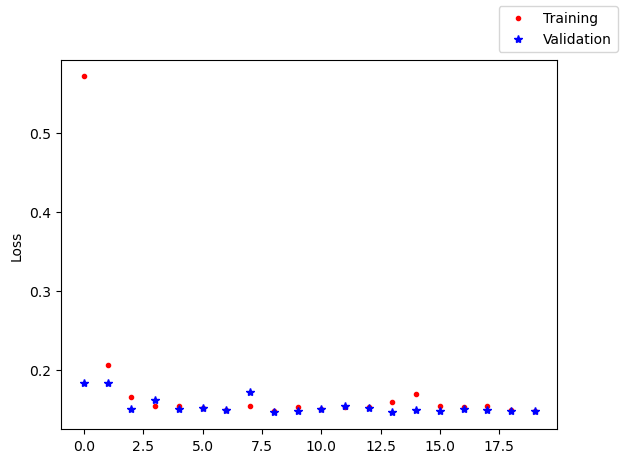

In [ ]:
# Set model parameters
epochs = 5
batch_size = 16
lr = 1e-4
embed_dim = 64
hidden_dim = embed_dim * 2
dropout = 0

model = MultiModalAttentionFuser(env_vars.shape[-1], timeseries.shape[-1], hidden_dim, embed_dim, dropout)
print(f"Total params of {model.__class__.__name__}: {sum(p.numel() for p in model.parameters() if p.requires_grad)}")

optimizer = AdamW(model.parameters(), lr)
criterion = BCEWithLogitsLoss(reduction='mean')
scheduler = CosineAnnealingLR(optimizer, T_max=epochs)

losses, vlosses = train_multi_modal(model, dataloader, val_loader, epochs, optimizer, scheduler, criterion, device)

fig, ax = plt.subplots()

ax.plot(losses, 'r.', label='Training', )
ax.plot(vlosses, 'b*', label='Validation')
ax.set_label('Epoch')
ax.set_ylabel('Loss')

fig.legend()
plt.show()